In [7]:
%%HTML
<!-- Make fonts readable at 1024x768 -->
<style>
.rendered_html { font-size:0.7em; }
</style>

In [4]:
# Optional: Set options for slide theme and transition
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/phuijse/.jupyter/nbconfig/"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
    'theme': 'simple',
    'transition': 'fast',
    'start_slideshow_at': 'selected',
    'width': 1024,
    'height': 768,
    'scroll': True
});

In [5]:
# Imports and matplotlib configuration
import numpy as np
import scipy.signal
%matplotlib notebook
import matplotlib.pylab as plt
import matplotlib as mpl
from ipywidgets import interact, FloatSlider, IntSlider, Layout
from IPython.display import Audio
# Default options for matplotlib plots
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['legend.framealpha'] = 0.5
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

### Universidad Austral de Chile 
## INFO183: Análisis de sistemas lineales
### <span style="color:blue">Sistemas para el procesamiento digital de señales</span>

# Unidad 1: Introducción al procesamiento digital de señales

### Dr. Pablo Huijse, phuijse at inf dot uach dot cl 


# Contenidos

1. [Conceptos básicos de señales](#section11)
1. [Clasificación y propiedades de las señales](#section12)



# Bibliografía

1. Alan V. Oppenheim y Alan S. Willsky, “Señales y Sistemas”, 2da edición, *Prentice Hall*, 1998, **BM621.382 OPP**
2. Alan V. Oppenheim y Ronald. W. Schafer, “Tratamiento de señales en tiempo discreto”, 3ra edición, *Pearson*, 2000, **BM621.382 OPPt**
3. Jonathan Y. Stein, “Digital Signal Processing: A Computer Science Perspective”, *John Wiley and Sons*, 2000
4. Monson H. Hayes, “Digital Signal Processing”. 2da edición, *Mc Graw Hill*, 2011




<a id='section11'></a>

# 1. Conceptos básicos de señales


¿Qué es una señal?
- Describe o representa el comportamiento de un fenómeno físico o sistema
- Patrón que exhibe variabilidad en tiempo, espacio u otra variable independiente


<img class="displayed" src="img/signal-ipsa.png">

<img src="img/signal-electric.gif">

<img src="img/signal-clock.png">

<img class="displayed" src="img/signal-transit.gif">

<img src="img/signal-audio.gif">

<img class="displayed" src="img/signal-eeg.png">

<img src="img/signal-weather.gif">

<img src="img/signal-bunny.gif">

**Procesamiento de señales** 

Disciplina que se decida al diseño de **sistemas** para la/el :
- representación,
- filtrado,
- codificación,
- transmisión,
- estimación,
- detección,
- inferencia,
- descubrimiento,
- reconocimiento,
- síntesis,
- reproducción,
- ...

de las señales. 


1. Jose S.F. Moura, "What is signal processing", *IEEE signal processing magazine*, DOI: <a href="https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5230869">10.1109/MSP.2009.934636 </a>

<a id="section12"></a>

# Clasificación y propiedades de las señales

- Una señal se representa matematicamente como una **función** (f)
$$
y = f(x)
$$
$$
x \mapsto f(x)
$$
$$
f: \mathcal{X} \rightarrow \mathcal{Y}, \quad x \in \mathcal{X} \wedge y \in \mathcal{Y},
$$
donde:
    - $x$ se llama **variable independiente**, **entrada** o **argumento** y su espacio se llama **dominio**
    - $y$ se llama **variable dependiente**, **salida** o **retorno** y su espacio se llama **codominio**

¿Qué es una función?
- Una función es una relación entre la variable independiente $x$ y dependiente $y$ 
    - Para cada $x$ existe un y solo un $y$ asociado
    - Puede haber más de una variable dependiente/indepediente


- **Ejemplos de variable independiente:** tiempo, coordenadas espaciales
    - Cuando una señal/función cambia en el tiempo hablamos de una **serie de tiempo**

### Clasificación según tipo de variable

A grandes rasgos podemos clasificar las señales como:

- Variable independiente continua
- Variable independiente discreta
- Variable dependiente continua: **Señal analógica**
- Variable dependiente discreta o cuantizada: **Señal digital**

¿Cómo se clasifican los ejemplos de señal que vimos recientente?



<img src="img/signal-classification1.png">

- Los computadores trabajan con **señales digitales de tiempo discreto**
- Los señales "naturales" son en general analógicas de tiempo continuo
- Para trabajar con señales analógicas en nuestro computador:
    - Se discretiza en el tiempo **muestreando** según el reloj del sistema, por ejemplo:
$$
x_A(t=kT_S) = x[k], \quad k \in \mathbb{Z}
$$
    - Se cuantiza la amplitud, por ejemplo:
$$
v_D = \begin{cases} 0 & v_A \in [0.0, 0.8] V \\ 1 & v_A \in [2.0, 5.0] V\end{cases}
$$


- Una señal discreta es una secuencia de valores indexada por un entero
    

<IPython.core.display.Javascript object>


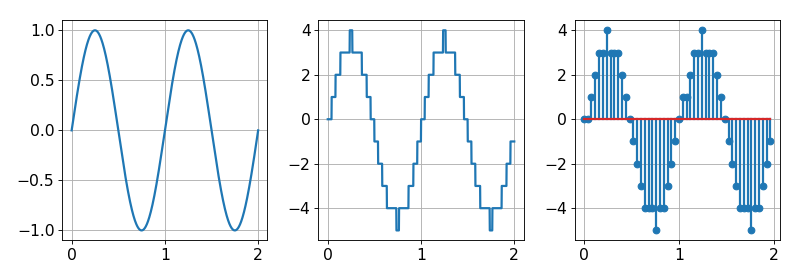

In [100]:
x = np.linspace(0.0, 2.0, num=1000)
y = np.sin(2.0*np.pi*1.0*x)
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5), dpi=80, tight_layout=True)
ax[0].plot(x, y)
ax[1].plot(x, np.floor(y//0.249))
ax[2].stem(x[::20], np.floor(y[::20]//0.249));

### Funciones típicas

Impulso unitario:
$$
\delta[n] = \begin{cases} 1 & n=0\\ 0 & n \neq 0 \end{cases}
$$
Escalo unitario:
$$
u[n] = \sum_{k=0}^\infty \delta[n-k] = \begin{cases} 1 & n\geq 0\\ 0 & n < 0 \end{cases} 
$$
Propiedad: $\delta[n] = u[n] - u[n-1]$

Función exponencial compleja:
$$
y[n] = e^{jn\omega} = \Re [e^{jn\omega}] + j \Im[e^{jn\omega}]  = \cos(n\omega) + j \sin (n\omega)
$$

<IPython.core.display.Javascript object>


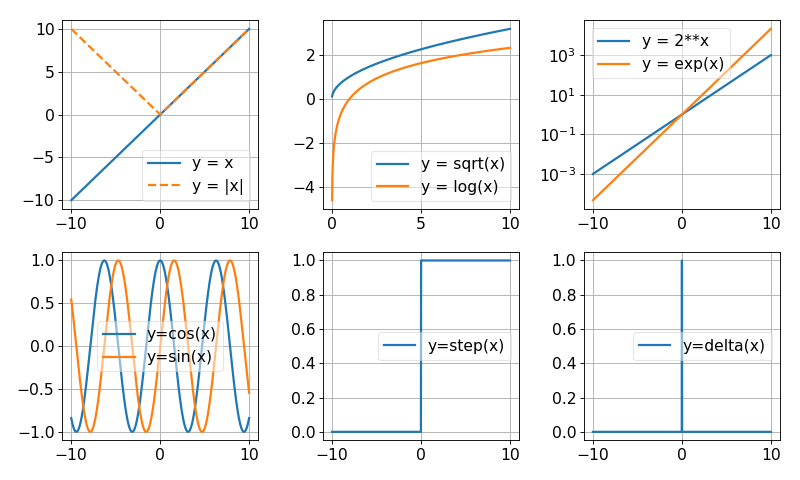

In [98]:
x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots(2, 3, figsize=(10, 6), dpi=80, tight_layout=True)
ax[0, 0].plot(x, x, label='y = x');  
ax[0, 0].plot(x, np.absolute(x), label='y = |x|', linestyle='--');  ax[0, 0].legend()
ax[0, 1].plot(x[x>0], np.sqrt(x[x>0]), label='y = sqrt(x)'); 
ax[0, 1].plot(x[x>0], np.log(x[x>0]), label='y = log(x)');  ax[0, 1].legend();
ax[0, 2].plot(x, 2**x, label='y = 2**x');
ax[0, 2].plot(x, np.exp(x), label='y = exp(x)');  ax[0, 2].legend(); ax[0, 2].set_yscale('log')
ax[1, 0].plot(x, np.cos(x), label='y=cos(x)')
ax[1, 0].plot(x, np.sin(x), label='y=sin(x)'); ax[1, 0].legend()
ax[1, 1].plot(x, np.heaviside(x, 0), label='y=step(x)'); ax[1, 1].legend()
ax[1, 2].plot(x, scipy.signal.unit_impulse(len(x), 'mid'), label='y=delta(x)'); ax[1, 2].legend();

<IPython.core.display.Javascript object>


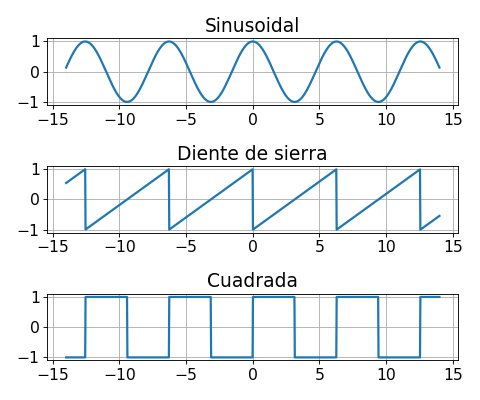

In [298]:
x = np.linspace(-14, 14, num=1000)
fig, ax = plt.subplots(3, 1, figsize=(6, 5), dpi=80, tight_layout=True)
ax[0].plot(x, np.cos(x)); ax[0].set_title('Sinusoidal')
ax[1].plot(x, scipy.signal.sawtooth(x));  ax[1].set_title('Diente de sierra')
ax[2].plot(x, scipy.signal.square(x));  ax[2].set_title('Cuadrada');

### Algunas propiedades de las funciones

- Función par o simétrica: 
$$f(x) = f(-x) $$
- Función inpar o antisimétrica: 
$$f(x) = -f(-x) $$
- Función periódica: 
$$\exists ~ T ~\text{tal que}~ f(x) = f(x+T) $$
- Función lineal (adición vectorial y multiplicación escalar): 
$$f(ax + by) = a f(x) + b f(y),$$
con $a$, $b$ coeficientes escalares 


<IPython.core.display.Javascript object>


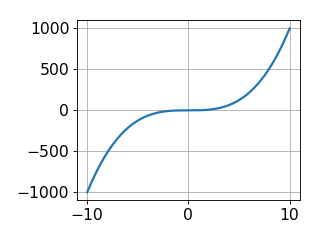

In [109]:
x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots(figsize=(4, 3), dpi=80, tight_layout=True)
ax.plot(x, -(-x)**3, label='y = x');  

<IPython.core.display.Javascript object>


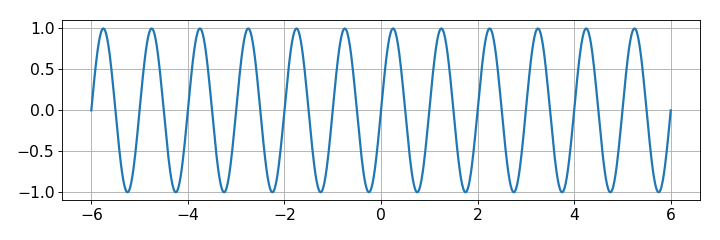

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Frequency', layout=Layout(h…

In [313]:
fig, ax = plt.subplots(figsize=(9, 3), dpi=80, tight_layout=True)
t = np.linspace(-6, 6, num=1000)
x = np.sin(2*np.pi*1*t)
line, = ax.plot(t, x)
def update(f = 1.0):
    line.set_ydata(np.sin(2*np.pi*f*t));
    fig.canvas.draw();
interact(update, f=FloatSlider(description="Frequency", value=1.0, min=0.0, max=1.0, step=0.01, continuous_update=False, 
                               style={'description_width': 'initial'}, layout=Layout(width='500px', height='20px')));

### Propiedades de las señales

- Siempre trabajaremos con señales que dentro de un rango de interés observado son **acotadas** en energía, potencia y/o en ancho de banda dentro. 
    - Es decir son señales finitas (no divergen ni se vuelven singulares)

- El rango en que una señal varía se conoce como su **rango dinámico**

- La **energía** de una señal mide su "tamaño" o el "espacio que ocupa". Para una señal analógica y discreta, respectivamente
$$
E_s = \int_{-\infty}^\infty |s(t)|^2 \,dt  \qquad E_s = \sum_{n=-\infty}^\infty |s[n]|^2 
$$
    - Una señal acotada en energía debe cumplir $E_s < \infty$
- La **potencia** promedio de una señal se define como su energía por unidad de tiempo
$$
P_s = \lim_{T\to \infty} \frac{1}{2T} \int_{- T}^{T} |s(t)|^2 \,dt  \qquad P_s = \lim_{N\to \infty} \frac{1}{2N+1} \sum_{n = - N}^{N} |s[n]|^2 
$$
    - Una señal acotada en potencia debe cumplir $P_s < \infty$
    - Una señal de energía finita tiene potencia cero
    - Una señal de potencia finita tiene duración infinita

- El **ancho de banda** de una señal mide su tasa de cambio o velocidad
    - Una señal acotada en **ancho de banda** debe tener transiciones suaves


¿Cual es la energía de esta señal?
$$
x(t) = \begin{cases} 0 & t < 0 \\ 2e^{-t/2} & t \geq 0\end{cases}
$$

<IPython.core.display.Javascript object>


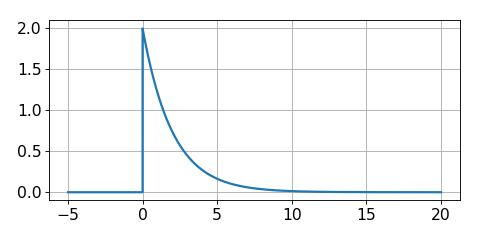

4.0020003250765726


In [281]:
dt=0.001; x = np.arange(-5, 20, step=dt)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
fig, ax = plt.subplots(figsize=(6, 3), dpi=80, tight_layout=True)
ax.plot(x, y)
print((y**2).sum()*dt)

### Clasificación según características de la señal

- **Señal determinista:** Puede describirse completamente por una ecuación matemática, e.g. $y = \cos(\omega x)$
- **Señal estocástica:** Se describe probabilisticamente, es decir en términos de su densidad de probabilidad, e.g. $ z \sim \mathcal{N}(\mu, \Sigma)$




<IPython.core.display.Javascript object>


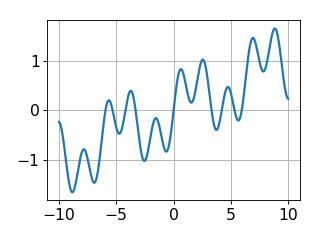

In [128]:
x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots(figsize=(4, 3), dpi=80, tight_layout=True)
ax.plot(x, np.cos(x)*np.sin(2*x) + 0.1*x);  

- Las señales deterministas se generan por un algoritmo o sistema no probabilístco y por ende son reproducibles y predecibles: conocemos su valor

<IPython.core.display.Javascript object>


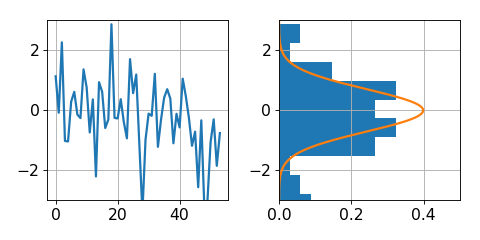

interactive(children=(IntSlider(value=1, continuous_update=False, description='Number of realizations', layout…

In [215]:
from ipywidgets import interact, IntSlider, Layout
fig, ax = plt.subplots(1, 2, figsize=(6, 3), dpi=80, tight_layout=True)
x = np.linspace(-3, 3, num=1000)
data = np.random.randn(1)
def update(N = 1.0):
    data = np.random.randn(N)
    ax[0].cla(); ax[0].plot(data); ax[0].set_ylim(-3, 3);
    ax[1].cla(); ax[1].hist(data, bins=10, density=True, orientation=u'horizontal'); 
    ax[1].plot(np.exp(-x**2)/np.sqrt(2.0*np.pi), x); ax[1].set_ylim(-3, 3); ax[1].set_xlim(0, 0.5);
    fig.canvas.draw()
interact(update, N=IntSlider(description="Number of realizations", min=1, max=200, continuous_update=False, 
                             style={'description_width': 'initial'}, layout=Layout(width='500px', height='20px')));

- Las señales estocásticas se modelan como una variable aleatoria: no conocemos su valor
- Pero, podemos conocer el tipo y parámetros de su distribución, por ejemplo media y varianza de una normal    

## Ruido en las señales

- En la práctica no solemos observar señales puramente deterministas
- Esto se debe a la presencia del **ruido**
- El ruido es una señal puramente estocástica
- El ruido es una corrupción indeseable que modifica la señal de interés
- Un modelo clásico consiste en asumir una corrupción aditiva
$$
y[k] = x[k] + n[k],
$$
donde $y$ es la señal observada, $x$ es la señal de interés y $n$ es una señal de ruido

<IPython.core.display.Javascript object>


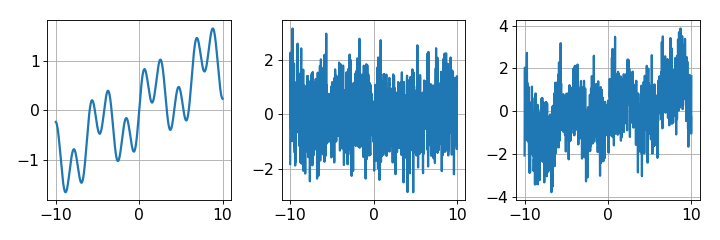

interactive(children=(FloatSlider(value=1.0, description='s', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [307]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), dpi=80, tight_layout=True)
t = np.linspace(-10, 10, num=1000)
x = np.cos(t)*np.sin(2*t) + 0.1*t
ax[0].plot(t, x)
def update(s = 1.0):
    n = np.random.randn(len(t))*s
    ax[1].cla(); ax[1].plot(t, n)
    ax[2].cla(); ax[2].plot(t, x+n)
    fig.canvas.draw()
interact(update, N=FloatSlider(description="Noise std", min=0.0, max=10.0, continuous_update=False, 
                             style={'description_width': 'initial'}, layout=Layout(width='500px', height='20px')));

- Podemos cuantificar el "nivel de ruido" o la claridad de la señal observado en términos de la **razón señal a ruido** (SNR)
- La SNR se define como la razón entre la energía de la señal y la energía del ruido
- La SNR se mide en decibeles [dB]

$$
\text{SNR} = 10 \log_{10} \frac{E_x}{E_n}
$$

<IPython.core.display.Javascript object>


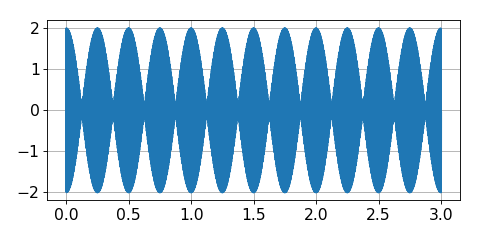

In [12]:
# Generate a sound
sample_rate = 44100
time = np.arange(0, 3, step=1.0/sample_rate)
data = np.sin(2*np.pi*220*time) + np.sin(2*np.pi*224*time)
fig, ax = plt.subplots(figsize=(6, 3), dpi=80, tight_layout=True)
ax.plot(time, data);
Audio(data, rate=sample_rate)

<IPython.core.display.Javascript object>


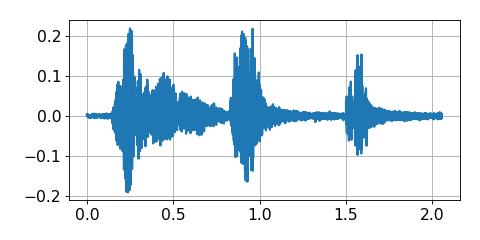

In [13]:
import soundfile as sf
data, sample_rate = sf.read("data/123.ogg")
time = np.linspace(0.0, len(data)/sample_rate, num=len(data))
fig, ax = plt.subplots(figsize=(6, 3), dpi=80, tight_layout=True)
ax.plot(time, data);
Audio(data, rate=sample_rate)